# penguins_binary_classification

In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [96]:
df=pd.read_csv("penguins_binary_classification.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009


In [97]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')

In [98]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


In [99]:
print(df.info())
print('\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB
None


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      274.000000     274.000000         274.000000   274.000000   
mean        42.702920      16.836131         202.178832  4318.065693   
std          5.195566       2.013410          15.047938   835.933105   
min         32.100000      13.100000         172.000000  2850.000000   
25%         38.350000      15.0000

In [100]:
df = df[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
df['species']=df['species'].astype('object')
print(df.shape)
df.head()

(274, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


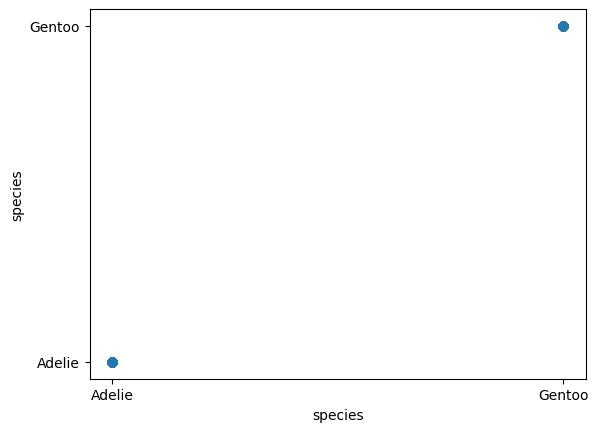

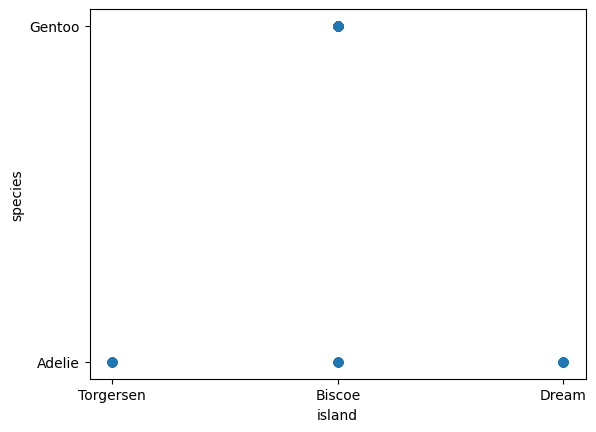

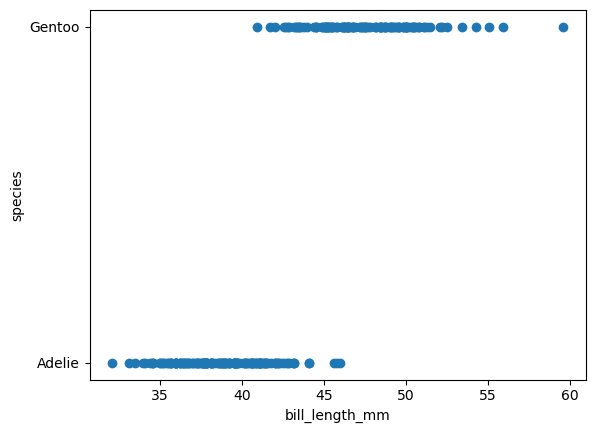

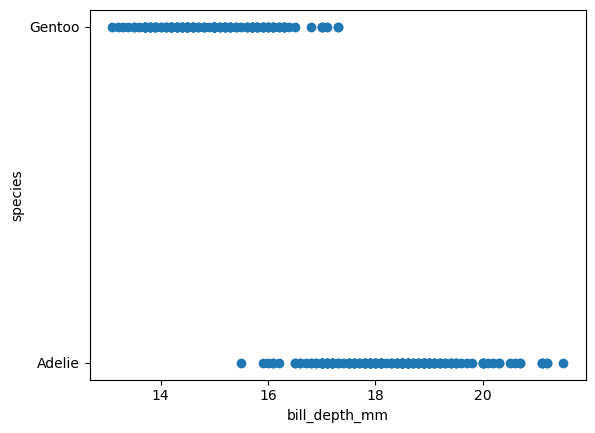

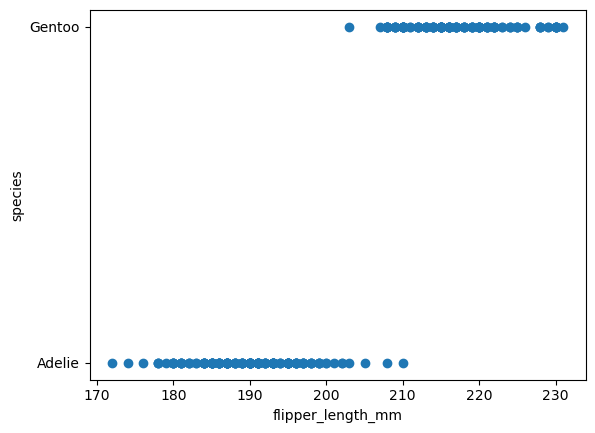

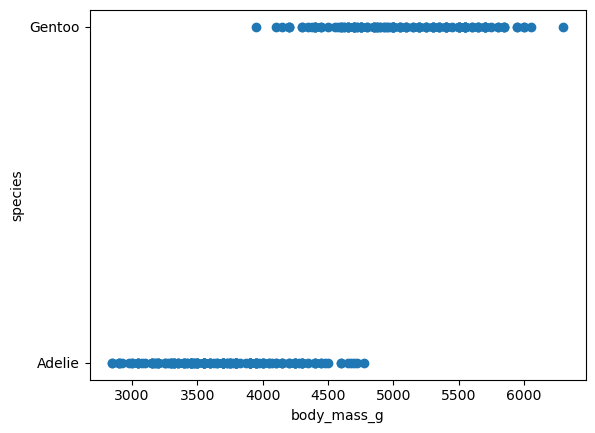

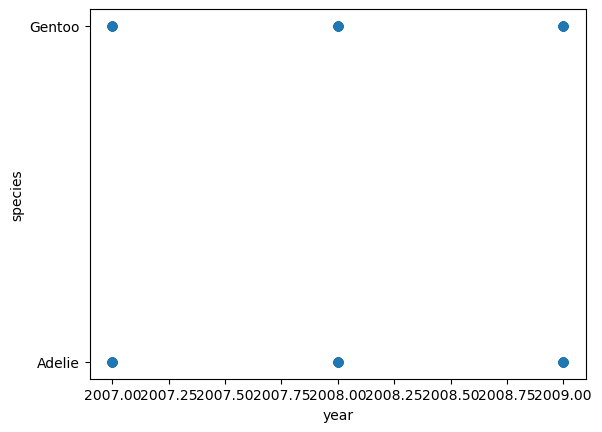

In [101]:
for i in df.columns:
    plt.scatter(df[i],df['species'])
    plt.xlabel(i)
    plt.ylabel("species")
    plt.show()

In [108]:
X=df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
Y=df[['species']]
np_X=np.asanyarray(X)
np_Y=np.asanyarray(Y)

<AxesSubplot:>

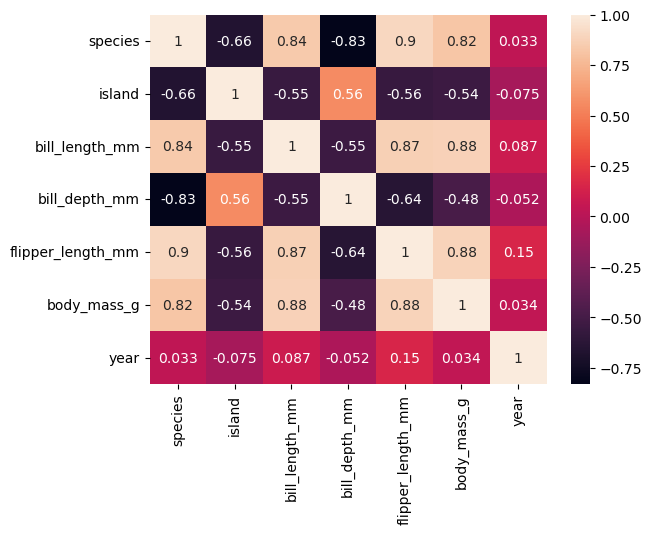

In [109]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df['island'] = encoder.fit_transform(df['island'])
sns.heatmap(df.corr(),annot=True)

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=42)


In [111]:
X_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
177,0,44.5,14.3,216.0,4100.0,2007
248,0,46.9,14.6,222.0,4875.0,2009
74,2,42.8,18.5,195.0,4250.0,2008
170,0,48.7,15.1,222.0,5350.0,2007
29,1,39.5,16.7,178.0,3250.0,2007


In [112]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (164, 6) (164, 1)
Test set: (110, 6) (110, 1)


In [113]:
X=df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
Y=df[['species']]

In [114]:
model=LogisticRegression(C=0.01,solver='liblinear',verbose=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

[LibLinear]

C:\Users\Sap\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
Y_pred=model.predict(X_test)
Y_pred_prob=model.predict_proba(X_test)
print(Y_pred)
print('\n')
print((Y_pred_prob))

[0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0]


[[9.99679386e-01 3.20613620e-04]
 [3.35663202e-04 9.99664337e-01]
 [8.42052197e-03 9.91579478e-01]
 [9.99312411e-01 6.87588773e-04]
 [2.94814059e-02 9.70518594e-01]
 [2.10410084e-04 9.99789590e-01]
 [1.19045529e-01 8.80954471e-01]
 [2.47036245e-02 9.75296375e-01]
 [9.56459646e-03 9.90435404e-01]
 [1.66798143e-05 9.99983320e-01]
 [9.99732632e-01 2.67367780e-04]
 [9.94886015e-01 5.11398491e-03]
 [1.14748196e-05 9.99988525e-01]
 [3.83295838e-02 9.61670416e-01]
 [1.11387686e-03 9.98886123e-01]
 [9.99278577e-01 7.21423266e-04]
 [5.36998362e-03 9.94630016e-01]
 [9.31608610e-01 6.83913903e-02]
 [9.96877094e-01 3.12290609e-03]
 [1.39766073e-02 9.86023393e-01]
 [9.99828279e-01 1.71720759e-04]
 [9.97984756e-01 2.01524370e-03]
 [4.85025170e-04 9.99514975e-01]
 [4.36121895e-0

Model achieved a classification accuracy of:	1.0


Model Confusion Matrix


Jaccard Similarity Score:	1.0


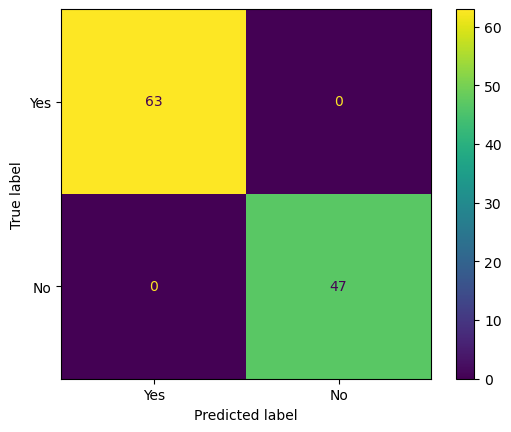

In [116]:
print("Model achieved a classification accuracy of:",end='\t')
print(accuracy_score(Y_test,Y_pred))
dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=["Yes","No"])
print('\n')
dsp.plot()
print("Model Confusion Matrix")

print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(Y_test,Y_pred))

In [117]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        47

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

